# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

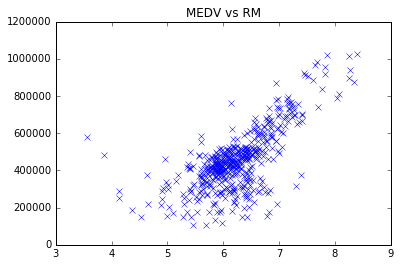

In [15]:
# MEDV vs RM:
from matplotlib import pyplot as plt
plt.plot(features["RM"],prices,'x')
plt.title("MEDV vs RM")

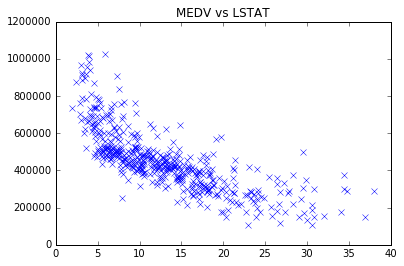

In [14]:
plt.plot(features["LSTAT"],prices,'x')
plt.title("MEDV vs LSTAT")

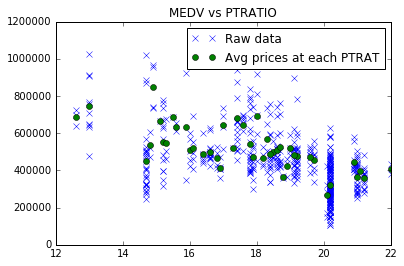

In [29]:
plt.plot(features["PTRATIO"],prices,'x')
plt.title("MEDV vs PTRATIO")

ptRat = list(set(features["PTRATIO"]))

medv = list()
for i in range(len(ptRat)):
    medv.append(np.mean([prices[k] for k in range(len(features["PTRATIO"])) if features["PTRATIO"][k] == ptRat[i]]))

plt.plot(ptRat,medv,'o')
plt.legend(["Raw data","Avg prices at each PTRAT"])

**Answer:**
**RM:** Intuitively, increase in the number of rooms will lead to an increase in the property price. The underlying assumption is that the more number of rooms means a larger area (and NOT more rooms for the same total area) and will cost more.
The data (see MEDV vs RM plot above) confirms this for a home with more than 5 rooms. For homes with less than 5 rooms, the price seems to rise with decreasing number of rooms. This is a clear outlier and could be due to other factors (or features) that are not modeled by the number of rooms.

**LSTAT:** Intuitively, increase in the % of working poor in the neighborhood will lead to a fall in the property price. Lower class neighborhoods have been known to be crime-prone. Also, property prices are high in areas where the household incomes are high.
The data confirms this trend.

**PTRATIO:** Intuitively, the higher the ratio of students to teachers, the more popular the neighborhood is among families who want to live closer to the school districts. It could also mean that the neighborhood has better quality schools. This will lead to higher housing prices.

The data does **not** confirm this trend. In fact, the housing prices seem to drop (on average) as illustrated in the plot above.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [30]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [31]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**0.923
The model successfully captures the variation of the target variable. The Coefficient of Determination is close to 1.0.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [32]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, train_size=0.8, random_state = 1)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** In supervised learning, since the model is trained from a training dataset, there is a need for a testing dataset that the model is not exposed to. The performance of the model with the testing dataset will determine how good the model is in predicting unseen values in the training set.

Thus, while training a dataset to a model, it is imperative to set aside a portion of the data that has not been used for training for the purpose of testing and cross validation.

** Initial (partially) correct statement:**
If all the data is used for training, then the model will likely have high variance (over fitting) and will make poor predictions on unseen features.
Click [here](https://review.udacity.com/#!/reviews/226853) to see response from evaluation.


**Note to self: Avoid making generalizations without data to back you up. Be like the evaluator :)**



----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

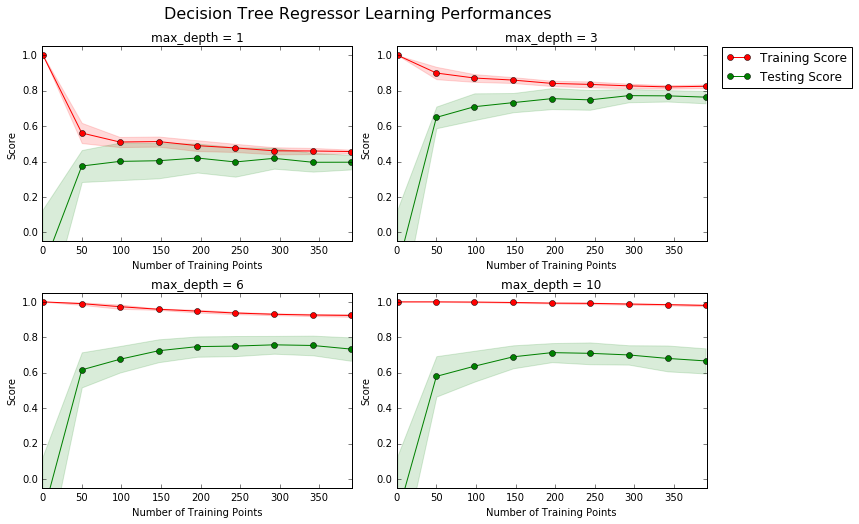

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
**max_depth = 1: ** Both training and testing scores seem to converge towards 0.4. This is a low R2 score even for the training set, which indicates the model underfits the data and likely suffers from high-bias. This means that the model does not have sufficient complex to accurately predict the housing prices. The data converges from above for the training set and from below for the test set.
**max_depth = 3: ** Both training and testing scores seem to converge towards 0.8, which is relatively high. This indicates that the model with the max_depth = 3 has achieved a healthy compromise between bias and variance. Also, by increasing the max_depth to 3, we have added complexity to the model which seems to have positively impacted the R2 score for both the training and testing data. The data converges from above for the training set and from below for the test set.
**max_depth = 6: ** The testing score converges to 0.7 while the training score converges to 0.9. This difference between the training and testing scores indicates the model has a slightly higher variance (slight over-fitting of data). This confirms that that adding more complexity adds more variance to the prediction. The data converges from above for the training set and from below for the test set.
**max_depth = 10: ** The training score is very close to 1 for different number of training points. This indicates that the model over-fits the data and the model likely suffers from low-bias and high variance. The learning curve for the test data seems to converge to about 0.6. The data converges from above for the training set and from below for the test set.

A good complexity for the model is 3 as illustrated above. For this level of complexity, the curve suggests that adding more than 200 training points does not improve the R2 score for the test dataset appreciably. Hence, I would say that adding more training points would not necessarily improve the quality of the model.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

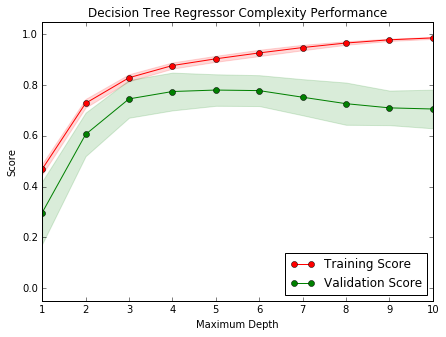

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** With a maximum depth of 1, the model suffers from high bias. This is indicated by the low R2 scores on the training set.
When the model is trained with a maximum depth of 10, the training score is close to 1, which indicates the model is over-fitted. It also suffers from high-variance since there is a relatively high delta between the validation and training scores.
Another visual cue is the width of the uncertainty. Note that for the training score, the width of the uncertainty reduces with increasing depth which is clear sign of overfitting and high-bias.
The width of uncertainty for the validation score does not show any significant change with maximum depth. This might mean that the maximum depth parameter has a much bigger impact on the bias of the model with a relatively smaller impact on the variance.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Best generalization to unseen data is seen for a maximum_depth of 5. Note that the validation score is the highest for max_depth = 5. The uncertainty width in the validation score also seems to be slightly lower at this depth compared to the other values. Hence, at this depth, a reasonable compromise has been made between bias and variance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search technique creates and fits the model to the data for all possible combinations of the parameters that are being varied and determines the parameter combination that fits the data best.
It can be applied to optimize a learning algorithm by identifying different parameter values for a given set of parameters and fitting the model to each combination of these and comparing the performance metric.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** k-fold cross-validation is a technique where the training-test data is split into k-folds, with each fold's output being the indices of the testing and training data. Thus, the k-fold method creates three sets of data sampled from the original dataset for training and testing.

This technique offers the benefit of training the model on a different set of data and therefore helps to identify a balance between bias and variance.

In reference to grid search, initially I was not sure how k-fold cross validation offers any specific benefit to grid search, other than the capability to average the results over k-different learning experiments.

After reading the instructors [comments](https://review.udacity.com/#!/reviews/226853), the following is my understanding:
Using Grid-search by by-itself might lead to a situation where the chosen hyper parameters might work well for the chosen training-set but not the test set. Using k-fold cross validation solves this problem since the grid-search is done over k-iterations with different training-test set combinations and the final model hyper parameters are the average over all these k-iterations.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [34]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [35]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **
Max depth for the optimal model is 4.

My response to Qn. 6 for the max depth was 5. This is because, the testing set visually had a better validation score for max_depth = 5 than max_depth = 4.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [36]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
ind = np.where(features['RM'] <= 5.0)[0]
print "Avg price of homes with less than 5 rooms: {}".format(np.mean(prices[ind]))

ind = np.where(features['RM'] > 5.0)[0]
print "Avg price of homes with more than 5 rooms: {}".format(np.mean(prices[ind]))

ind = np.where(features['LSTAT'] <= 15.0)[0]
print "Avg price of homes with LSTAT <= 15%: {}".format(np.mean(prices[ind]))

ind1 = np.where(features['LSTAT'] > 15.0)[0]
ind2 = np.where(features['LSTAT'] <= 30.0)[0]
ind = list(set(ind1) & set(ind2))
print "Avg price of homes with LSTAT between 15-30%: {}".format(np.mean(prices[ind]))

ind = np.where(features['LSTAT'] > 30.0)[0]
print "Avg price of homes with LSTAT >= 30%: {}".format(np.mean(prices[ind]))

ind = np.where(features['PTRATIO'] <= 15.0)[0]
print "Avg price of homes with PTRATIO <= 14%: {}".format(np.mean(prices[ind]))

ind1 = np.where(features['PTRATIO'] > 14.0)[0]
ind2 = np.where(features['PTRATIO'] <= 21.0)[0]
ind = list(set(ind1) & set(ind2))
print "Avg price of homes with PTRATIO between 14-21%: {}".format(np.mean(prices[ind]))

ind = np.where(features['PTRATIO'] > 21.0)[0]
print "Avg price of homes with PTRATIO >= 21%: {}".format(np.mean(prices[ind]))

ind = np.where(features['LSTAT'] <= 5.0)[0]
print "Avg price of homes with LSTAT <= 5%: {}".format(np.mean(prices[ind]))

Predicted selling price for Client 1's home: $419,700.00
Predicted selling price for Client 2's home: $287,100.00
Predicted selling price for Client 3's home: $927,500.00
Avg price of homes with less than 5 rooms: 302820.0
Avg price of homes with more than 5 rooms: 459137.974684
Avg price of homes with LSTAT <= 15%: 527324.770642
Avg price of homes with LSTAT between 15-30%: 313628.0
Avg price of homes with LSTAT >= 30%: 224525.0
Avg price of homes with PTRATIO <= 14%: 564471.428571
Avg price of homes with PTRATIO between 14-21%: 449853.930131
Avg price of homes with PTRATIO >= 21%: 366450.0
Avg price of homes with LSTAT <= 5%: 732018.0


**Answer: ** The statistics in the data exploration section simply provide the mean, median and std deviation of the prices from the entire dataset. We cannot come to any conclusion about a good selling price from the above statistics.

First, for homes with less than 5 rooms, the average price from the data is \$302820. This means that prediction for Client-1 is favorable while that for Client-2, the model seems to predict a value that is below the mean.

Further, for homes with LSTAT > 30\% the mean is \$224525. This is closed the the model's prediction for Client-2.

For Client-1, with a LSTAT between 15-30\%, the data has an average of \$313628 while the model prediction is \$100000 higher.
But, the PTRatio mean from the data (14-21\%) puts the prices at \$449853 which is close, but slightly more than the model's prediction.

For Client-1 and Client-2, I would stick with the model's prediction for the sale price.

For Client-3, all three statistics are way below the model prediction. On closer inspection, the average price of homes with LSTAT < 5\% is \$732018 which is still way below the prediction. If I recommend the model's prediction of \$937,230 for Client-3, there is a chance that the house might remain unsold due to the inflated price. I would recommend a lower price than the model predicts.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [35]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $28,652.84


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
1. Clearly, the data is outdated. The property prices from 1978 may not reflect the current property market adequately. New upscale neighborhoods might have come up in place of poorer neighborhoods in the past. 
2. Features described are number of rooms, neighborhood and student-teacher ratio. While these are some of the important features that most home buyers consider, these are not adequate. The condition of the home (old/new, well or poorly maintained, age of property) by the seller also plays a role.
3. From the sensitivity study, the range in princes is about \$28,652.84 which is less than 20\% of the standard deviation of the prices of all homes in the dataset. So, the model seems to be pretty robust and the learning algorithm used (Decision Tree Regressor) seems appropriate for this problem. From the response to Qn 10, the model seems to have made good predictions for 2 out of 3 clients while the third one is not too-far off the trend. This means that the constructed model is pretty good although it can be made better by careful choice of more features.
4. In the real-world setting, the data collected is too small to generalize to other cities. In fact, I would guess that the property markets are different even between 2 urban cities (eg. Boston vs New York vs Charlotte) let alone an urban and rural city. Property prices could be a function of the (local) economy and demography as well. So, a whole lot of other features need to be factored in before it can be applied to a real world setting.